In [ ]:
!unzip tf2.zip
ImageDataGenerator

Archive:  tf2.zip
replace data/train/cats/2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers

Using TensorFlow backend.


In [2]:
dataflow =ImageDataGenerator(rescale = 1.0 / 255.0)

In [3]:
train = dataflow.flow_from_directory('./data/train', class_mode= 'binary')

Found 40 images belonging to 2 classes.


In [5]:
test = dataflow.flow_from_directory('./data/test', class_mode= 'binary')

Found 20 images belonging to 2 classes.


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation = 'relu', padding = 'same', input_shape=(256, 256, 3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (5,5), activation = 'relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [8]:
sgd_opt = tf.keras.optimizers.SGD(lr = 0.01)

In [10]:
model.compile( optimizer = sgd_opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
model.fit(train, validation_data= test, epochs = 100)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2 steps, validate for 1 steps
Epoch 1/100
2/2 [==============================] - 12s 6s/step - loss: 0.7342 - accuracy: 0.5500 - val_loss: 0.8011 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 6s 3s/step - loss: 0.7661 - accuracy: 0.4500 - val_loss: 0.6991 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 6s 3s/step - loss: 0.6915 - accuracy: 0.5000 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 6s 3s/step - loss: 0.6901 - accuracy: 0.5000 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 6s 3s/step - loss: 0.6836 - accuracy: 0.5250 - val_loss: 0.6885 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 6s 3s/step - loss: 0.6771 - accuracy: 0.5500 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 6s 3s/step - loss: 0.6637 - ac

In [12]:
test_loss, test_accuracy = model.evaluate(test)

  ...
    to  
  ['...']
1/1 [==============================] - 1s 729ms/step - loss: 1.1506 - accuracy: 0.6000


In [13]:
test_loss

1.150573968887329

In [14]:
from matplotlib import pyplot as plt

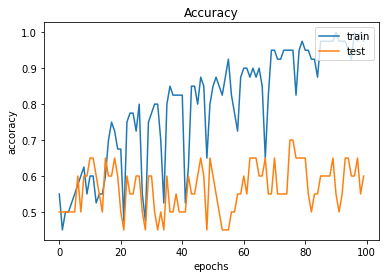

In [18]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accoracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()